In [177]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [212]:
df = pd.read_csv('./corona_data_sets_modified/df_final.csv') 
df

,ags5,ags2,kreis,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,average_distance_public_transport,Unnamed:_0,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,1001,1,"Flensburg, Stadt",92,500,35,240,2901,240,0,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,1002,1,"Kiel, Landeshauptstadt",92,460,37,268,2037,265,1,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,1003,1,"Lübeck, Hansestadt",90,532,37,297,1927,294,2,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,1004,1,"Neumünster, Stadt",85,588,37,316,1648,313,3,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,10041,10,Regionalverband Saarbrücken,76,734,52,260,1804,255,318,...,3431,37046,19917,14.4,31031,44117,53073,24122,13716,11119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,9776,9,Lindau (Bodensee),63,1056,36,461,3039,441,313,...,3334,53011,27281,7.6,1899,4382,10928,7859,6828,10105
397,9777,9,Ostallgäu,59,1418,33,907,3726,837,314,...,3231,52358,25107,6.3,4076,8392,16455,11687,10814,15803
398,9778,9,Unterallgäu,58,1369,32,855,4129,805,315,...,3297,60441,27461,6.1,4051,6995,15103,12738,10743,15768
399,9779,9,Donau-Ries,51,1765,33,788,3800,760,316,...,3368,57645,25919,5.6,2530,7245,16893,12552,9634,11118


In [218]:
print(', '.join(df.columns.to_numpy()))

ags5, ags2, kreis, supermarkets_population, supermarkets_average_distance, public_transport_availability, average_distance_bus_stop, average_distance_train_station, average_distance_public_transport, Unnamed:_0, number_of_students, number_of_hospitals, number_of_hospital_beds, number_of_hospital_beds_adj, hospital_patiants, households_of_1_person, households_of_2_person, households_of_3_person, households_of_4_person, households_of_5_person_or_more, household_with_kids, household_with_kids_under_3, household_with_kids_over_3_under_6, household_with_kids_over_6_under_10, household_with_kids_over_10_under_15, household_with_kids_over_15_under_18, household_with_double_income_no_kids, car_density, no_of_paths_per_person_and_day, kilometers_per_person_and_day, _percentage_out_of_home, share_of_journeys_on_foot, share_of_journeys_on_bike, proportion_of_motorised_vehicle_passenger, share_of_motorised_vehicle_driver, share_of_public_transport_, public_transport_per_1000_inhabitants, activity_

### Scaling the data

In [179]:
X = df.drop(["ags2","ags5","kreis"], 1)
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data

array([[ 1.43785315, -1.2448949 , -0.4875041 , ..., -0.50319801,
        -0.46613594, -0.4561535 ],
       [ 1.43785315, -1.32295755, -0.30446183, ...,  0.07085952,
        -0.09400719, -0.28489549],
       [ 1.31128546, -1.18244477, -0.30446183, ..., -0.04993485,
        -0.10152727, -0.23766549],
       ...,
       [-0.71379758,  0.45101622, -0.76206751, ..., -0.18406821,
        -0.11333795,  0.02761885],
       [-1.1567845 ,  1.22383647, -0.67054638, ..., -0.1922028 ,
        -0.16450219, -0.15570292],
       [-0.33409451,  0.10558898, -0.39598297, ..., -0.23125761,
        -0.07822885,  0.1136421 ]])

## PCA

In [220]:
pca = PCA(n_components=2)

In [221]:
pca.fit(X)

PCA(n_components=2)

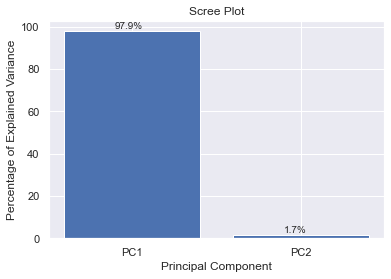

In [244]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
for index,data in enumerate(per_var):
    plt.text(x=index+0.9 , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=10))
plt.show()



In [223]:
principalComponents = pca.fit_transform(X)
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1
0,-9.077349e+05,-1.443980e+03
1,-3.474347e+05,-1.489734e+05
2,7.147000e+05,3.658538e+04
3,-1.068940e+06,2.167653e+04
4,-5.085298e+05,-2.986637e+05
...,...,...
396,7.971825e+05,4.042399e+05
397,2.360049e+06,4.711740e+05
398,-1.284391e+05,1.480733e+05
399,-8.445314e+05,-2.539959e+04


### Importance of each feature

In [225]:
pca_param = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2'])
pca_param = pca_param.T


In [226]:
pca_param.sort_values(['PC-1'], ascending=[False])

,PC-1,PC-2
guests_staying_overnight,0.915425,0.370547
number_of_guests,0.373235,-0.636572
2019_population,0.080502,-0.357872
2018_population,0.079980,-0.356390
2018_women_population,0.040735,-0.181521
...,...,...
car_density,-0.000009,0.000075
supermarkets_average_distance,-0.000024,0.000617
average_distance_train_station,-0.000050,0.000981
municipal_dept_per_capita,-0.000067,-0.000234


Text(0, 0.5, 'PCA 2')

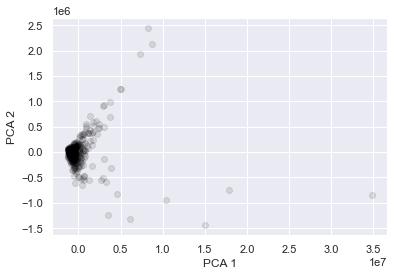

In [227]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Clustering 

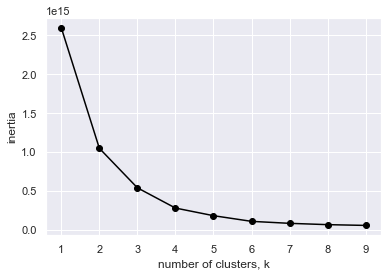

In [228]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [229]:
km = KMeans(n_clusters=3).fit(X)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = km.labels_
df = cluster_map.merge(df, left_on='data_index', right_index=True)

In [230]:
df

,data_index,cluster,ags5,ags2,kreis,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
0,0,1,1001,1,"Flensburg, Stadt",92,500,35,240,2901,...,2986,34496,19556,16.0,13209,12385,13092,5441,3096,3497
1,1,1,1002,1,"Kiel, Landeshauptstadt",92,460,37,268,2037,...,3304,35246,19612,12.1,22126,38523,39483,18567,11162,7841
2,2,1,1003,1,"Lübeck, Hansestadt",90,532,37,297,1927,...,3036,37219,20820,15.1,22881,30159,32571,15805,10999,9039
3,3,1,1004,1,"Neumünster, Stadt",85,588,37,316,1648,...,2842,38141,19561,17.9,7208,13291,10435,3812,3201,2805
4,4,1,10041,10,Regionalverband Saarbrücken,76,734,52,260,1804,...,3431,37046,19917,14.4,31031,44117,53073,24122,13716,11119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,396,1,9776,9,Lindau (Bodensee),63,1056,36,461,3039,...,3334,53011,27281,7.6,1899,4382,10928,7859,6828,10105
397,397,0,9777,9,Ostallgäu,59,1418,33,907,3726,...,3231,52358,25107,6.3,4076,8392,16455,11687,10814,15803
398,398,1,9778,9,Unterallgäu,58,1369,32,855,4129,...,3297,60441,27461,6.1,4051,6995,15103,12738,10743,15768
399,399,1,9779,9,Donau-Ries,51,1765,33,788,3800,...,3368,57645,25919,5.6,2530,7245,16893,12552,9634,11118


In [231]:
df.loc[df['cluster'] == 0]

,data_index,cluster,ags5,ags2,kreis,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,...,median_income,purchasing_power_per_household,purchasing_power_per_person,debtor_quota,household_in_income_calss_1,household_in_income_calss_2,household_in_income_calss_3,household_in_income_calss_4,household_in_income_calss_5,household_in_income_calss_6
12,12,0,1054,1,Nordfriesland,62,1445,34,792,3214,...,2768,50012,26306,9.8,7338,11367,25699,16935,12900,12744
13,13,0,1055,1,Ostholstein,64,1336,35,545,3492,...,2636,42842,23673,10.6,17821,18925,30089,17669,13301,13385
42,42,0,13071,13,Mecklenburgische Seenplatte,64,2002,31,665,3968,...,2325,37258,19580,10.4,28740,42844,35929,13036,9459,6082
43,43,0,13072,13,Landkreis Rostock,51,2173,37,821,2858,...,2239,43022,20888,9.9,16794,23603,28905,14424,11793,8879
44,44,0,13073,13,Vorpommern-Rügen,68,1535,33,589,3246,...,2194,36435,19806,10.9,23106,35590,32375,15034,9661,6338
46,46,0,13075,13,Vorpommern-Greifswald,67,1629,35,890,3008,...,2244,35525,18823,9.7,26198,36875,37329,12181,7503,5248
53,53,0,14612,14,Dresden,93,439,68,305,1547,...,2987,36642,19950,9.4,60046,87566,62994,39471,29437,22394
58,58,0,14713,14,Leipzig,96,376,69,329,1040,...,2807,33038,18566,13.2,85779,91184,70440,38443,25880,18564
109,109,0,3241,3,Hannover,86,639,49,440,2313,...,3387,42502,22017,11.5,86658,118256,154892,91374,69094,79207
133,133,0,3452,3,Aurich,53,1457,28,447,4532,...,2785,42639,21330,10.7,15731,15839,26502,15098,12357,9388


### Looking at the clusters

In [232]:
print(', '.join(df.loc[df['cluster'] == 0]['kreis'].to_numpy()))

Nordfriesland, Ostholstein, Mecklenburgische Seenplatte, Landkreis Rostock, Vorpommern-Rügen, Vorpommern-Greifswald, Dresden, Leipzig, Hannover, Aurich, Düsseldorf, Köln, Hochsauerlandkreis, Kreisfreie Stadt Frankfurt am Main, Waldeck-Frankenberg, Stuttgart, Breisgau-Hochschwarzwald, Ortenaukreis, Bodenseekreis, Garmisch-Partenkirchen, Passau, Nürnberg, Ostallgäu, Oberallgäu


In [233]:
df[['cluster', 'ags5']].groupby(['cluster']).agg(['count'])


,ags5
,count
cluster,
0,24
1,374
2,3


In [234]:
df.loc[df['cluster'] == 1]['kreis'].to_numpy()

array(['Flensburg, Stadt', 'Kiel, Landeshauptstadt', 'Lübeck, Hansestadt',
       'Neumünster, Stadt', 'Regionalverband Saarbrücken',
       'Landkreis Merzig-Wadern', 'Landkreis Neunkirchen',
       'Landkreis Saarlouis', 'Saarpfalz-Kreis', 'Landkreis St. Wendel',
       'Dithmarschen', 'Herzogtum Lauenburg', 'Pinneberg', 'Plön',
       'Rendsburg-Eckernförde', 'Schleswig-Flensburg', 'Segeberg',
       'Steinburg', 'Stormarn', 'Brandenburg an der Havel', 'Cottbus',
       'Frankfurt (Oder)', 'Potsdam', 'Barnim', 'Dahme-Spreewald',
       'Elbe-Elster', 'Havelland', 'Märkisch-Oderland', 'Oberhavel',
       'Oberspreewald-Lausitz', 'Oder-Spree', 'Ostprignitz-Ruppin',
       'Potsdam-Mittelmark', 'Prignitz', 'Spree-Neiße', 'Teltow-Fläming',
       'Uckermark', 'Rostock, Hansestadt', 'Schwerin, Landeshauptstadt',
       'Nordwestmecklenburg', 'Ludwigslust-Parchim', 'Chemnitz',
       'Erzgebirgskreis', 'Mittelsachsen', 'Vogtlandkreis', 'Zwickau',
       'Bautzen', 'Görlitz', 'Meißen', 'Sä

In [235]:
print(', '.join(df.loc[df['cluster'] == 2]['kreis'].to_numpy()))

Berlin, Hamburg, München


In [196]:
#df.to_csv('./corona_data_sets_modified/df_final_with_clusters.csv')